In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
bike_rentals = pd.read_csv('Bike-Sharing-Dataset/day.csv')

In [11]:
bike_rentals = bike_rentals.dropna()

In [13]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [30]:
bike_rentals = bike_rentals.select_dtypes(exclude = 'object')

In [31]:
y = bike_rentals['cnt']
X = bike_rentals.drop(columns = ['cnt'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
prediction = regressor.predict(X_test)

In [36]:
print("R2: ", r2_score(y_test, regressor.predict(X_test)))

R2:  1.0


In [67]:
print('linear model coeff (w): {}'
     .format(regressor.coef_))
print('linear model intercept (b): {:.3f}'
     .format(regressor.intercept_))
print('R-squared score (training): {:.3f}'
     .format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regressor.score(X_test, y_test)))

linear model coeff (w): [-1.98108948e-15  2.10125433e-13  7.52409163e-14 -6.76352892e-14
 -2.28382488e-13  3.78363936e-14 -4.23926637e-13  6.06966316e-13
 -2.06592290e-12  2.34601658e-12 -2.99438577e-13 -2.98534052e-13
  1.00000000e+00  1.00000000e+00]
linear model intercept (b): -0.000
R-squared score (training): 1.000
R-squared score (test): 1.000


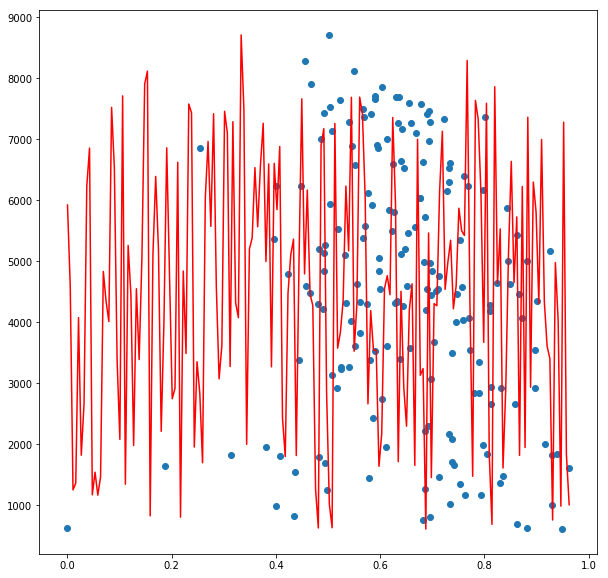

In [66]:
plt.figure(figsize = (10,10))
plt.scatter(X_test.hum, y_test)
plt.plot(np.linspace(X_test.hum.min(), X_test.hum.max(), X_test.hum.shape[0]), prediction, color = 'red')
plt.show()